## MDP
Create a 100x100 grid with obstacles in between 2 random points. Build an MDP based RL agent to optimise both policies and actions at every state. Benchmark DP method with other RL solutions for the same problem.

In [262]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap

In [300]:
GRID_SIZE = 100
OBSTACLE_DENSITY = 0.3
STEP_PENALTY = -1
GOAL_REWARD = 100
OBSTACLE_PENALTY = -50
SEED = 12  

random.seed(SEED)
np.random.seed(SEED)

In [302]:
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Set start and goal positions
start = (0, 0)
goal = (GRID_SIZE - 1, GRID_SIZE - 1)
grid[goal] = GOAL_REWARD  # Goal reward
grid[start] = 0           # Start point


In [304]:
# Set Obstacles
num_obstacles = int(GRID_SIZE * GRID_SIZE * OBSTACLE_DENSITY)
for _ in range(num_obstacles):
    obstacle = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    if obstacle != start and obstacle != goal:
        grid[obstacle] = OBSTACLE_PENALTY

In [306]:
values = np.zeros((GRID_SIZE, GRID_SIZE))  # Initialize value function
policy = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)  # Store optimal policy actions

In [308]:
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [310]:
def value_iteration(grid, values, discount_factor=0.9, theta=1e-4):
    while True:
        delta = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if (x, y) == goal or grid[x, y] == OBSTACLE_PENALTY:
                    continue
                
                v = values[x, y]
                new_values = []
                
                # Calculate value for each action
                for idx, (dx, dy) in enumerate(actions):
                    nx, ny = x + dx, y + dy
                    if 0 <= ny < GRID_SIZE and 0 <= nx < GRID_SIZE:
                        reward = grid[nx, ny] if grid[nx, ny] != OBSTACLE_PENALTY else OBSTACLE_PENALTY
                        new_values.append(reward + discount_factor * values[nx, ny])
                    else:
                        new_values.append(STEP_PENALTY)  # Penalty for moving out of bounds
                
                # Update values and policy
                best_value = max(new_values)
                best_action = new_values.index(best_value)
                values[x, y] = best_value
                policy[x, y] = best_action
                delta = max(delta, abs(v - values[x, y]))
        
        if delta < theta:
            break

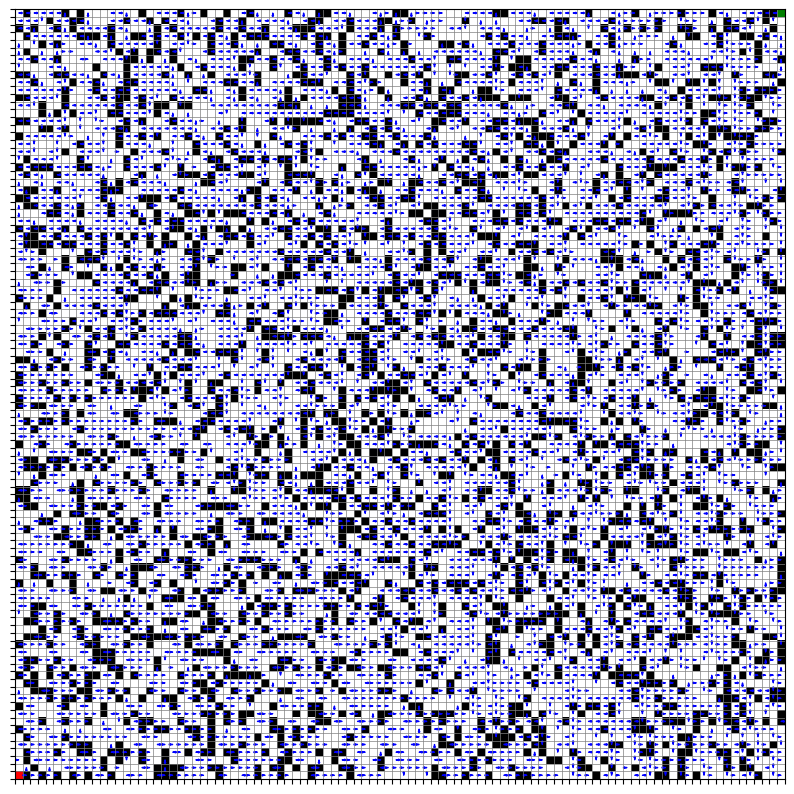

In [312]:
value_iteration(grid, values)

# Visualization of Grid with Policy
def plot_grid(grid, policy, start, goal):
    cmap = ListedColormap(["white", "black", "green", "red"])
    display_grid = np.zeros_like(grid)
    display_grid[grid == OBSTACLE_PENALTY] = 1  # Obstacle color
    display_grid[goal] = 2                       # Goal color
    display_grid[start] = 3                      # Start color
    
    plt.figure(figsize=(10, 10))
    plt.imshow(display_grid, cmap=cmap,origin="lower")
    
    plt.grid(visible=True, color="gray", linestyle="-", linewidth=0.5)
    plt.xticks(np.arange(-0.5, GRID_SIZE, 1), [])
    plt.yticks(np.arange(-0.5, GRID_SIZE, 1), [])
    plt.gca().set_xticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    plt.gca().grid(which="minor", color="gray", linestyle="-", linewidth=0.5)
    # Plot arrows for policy
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if (x, y) == start or (x, y) == goal or grid[x, y] == OBSTACLE_PENALTY:
                continue
            
            action = policy[x, y]
            dx, dy = actions[action]
            plt.arrow(x, y, dx * 0.3, dy * 0.3, color="blue", head_width=0.2, head_length=0.2)
    
  
    plt.show()

plot_grid(grid, policy, start, goal)
